In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

From the above summary, it seems there is no null value in the dataset. But we will further investigate

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


All the features are in correct data type.

In [7]:
# Checking count of each column
for i in df:
    print(df[i].value_counts())
    

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
16884.92400    1
29330.98315   

There is no null value and white space present in the data set.

In [8]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique values")

,No of Unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [9]:
# Checking duplicate records in the dataset
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df[df['charges']==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


We found one duplicate record and we will delete it.

In [11]:
df.drop(index =[581], inplace =True)

In [12]:
# Again checking record
df.duplicated().sum()

0

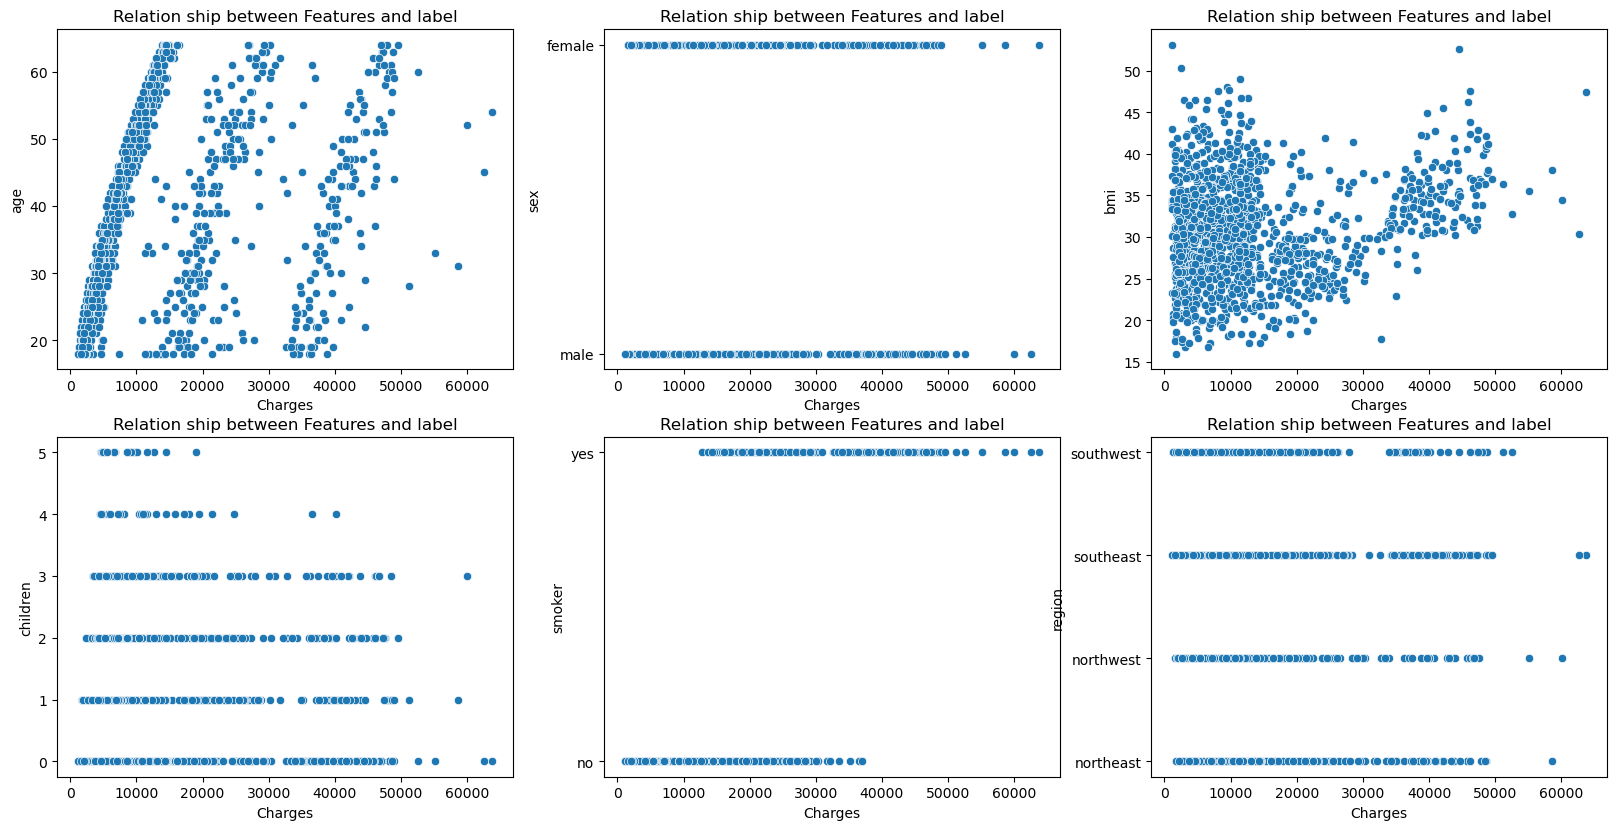

In [13]:
# Plotting scatter plot to check relation ship between features and label
plt.figure(figsize =(20,15))
plotnumber =1

for column in df:
    if plotnumber <= 6:
        plt.subplot(3,3, plotnumber)
        sns.scatterplot(x ='charges', y =column, data =df)
        plt.xlabel('Charges')
        plt.ylabel(column)
        plt.title("Relation ship between Features and label")
    plotnumber+=1
plt.show()

In [14]:
# Seperating Numerical and categorical columns

# Categorical Column
cat_col =[]
for i in df.dtypes.index:
    if df[i].dtypes =='object':
        cat_col.append(i)
print("Categorical Columns: ", cat_col)
print('\n')

# Numerical columns
num_col =[]
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        num_col.append(i)
print("Numerical columns: ", num_col)


Categorical Columns:  ['sex', 'smoker', 'region']


Numerical columns:  ['age', 'bmi', 'children', 'charges']


sex
male      675
female    662
Name: count, dtype: int64


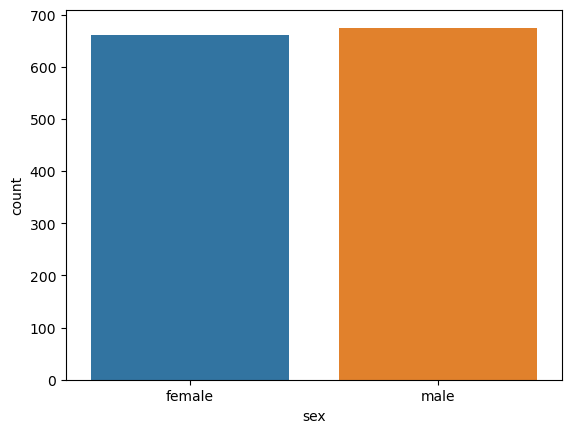

In [15]:
# Visualize the count of sex column
print(df['sex'].value_counts())
ax =sns.countplot(x ='sex', data =df)
plt.show()

smoker
no     1063
yes     274
Name: count, dtype: int64


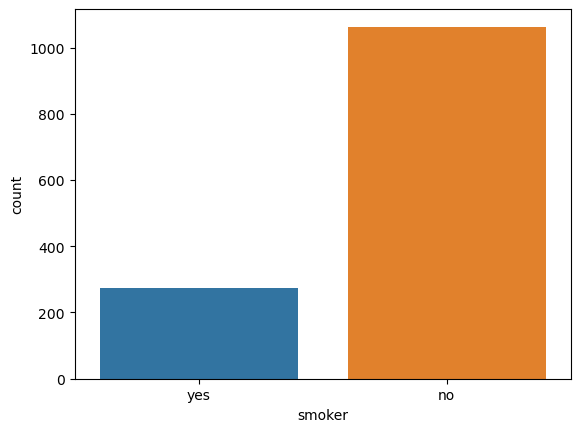

In [16]:
# Visualize the count of smoker
print(df['smoker'].value_counts())
sns.countplot(x ='smoker', data =df)
plt.show()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


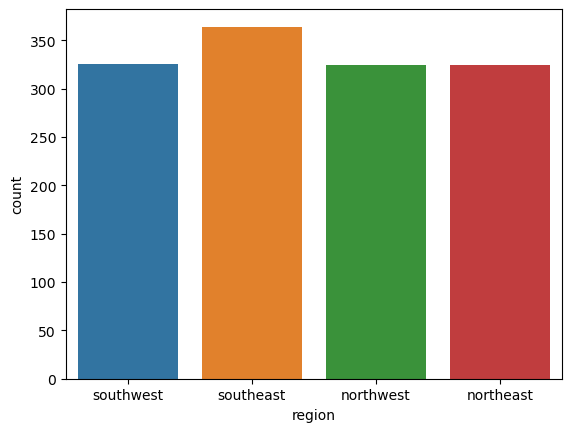

In [17]:
# Visualize the count of region
print(df['region'].value_counts())
sns.countplot(x ='region', data =df)
plt.show()

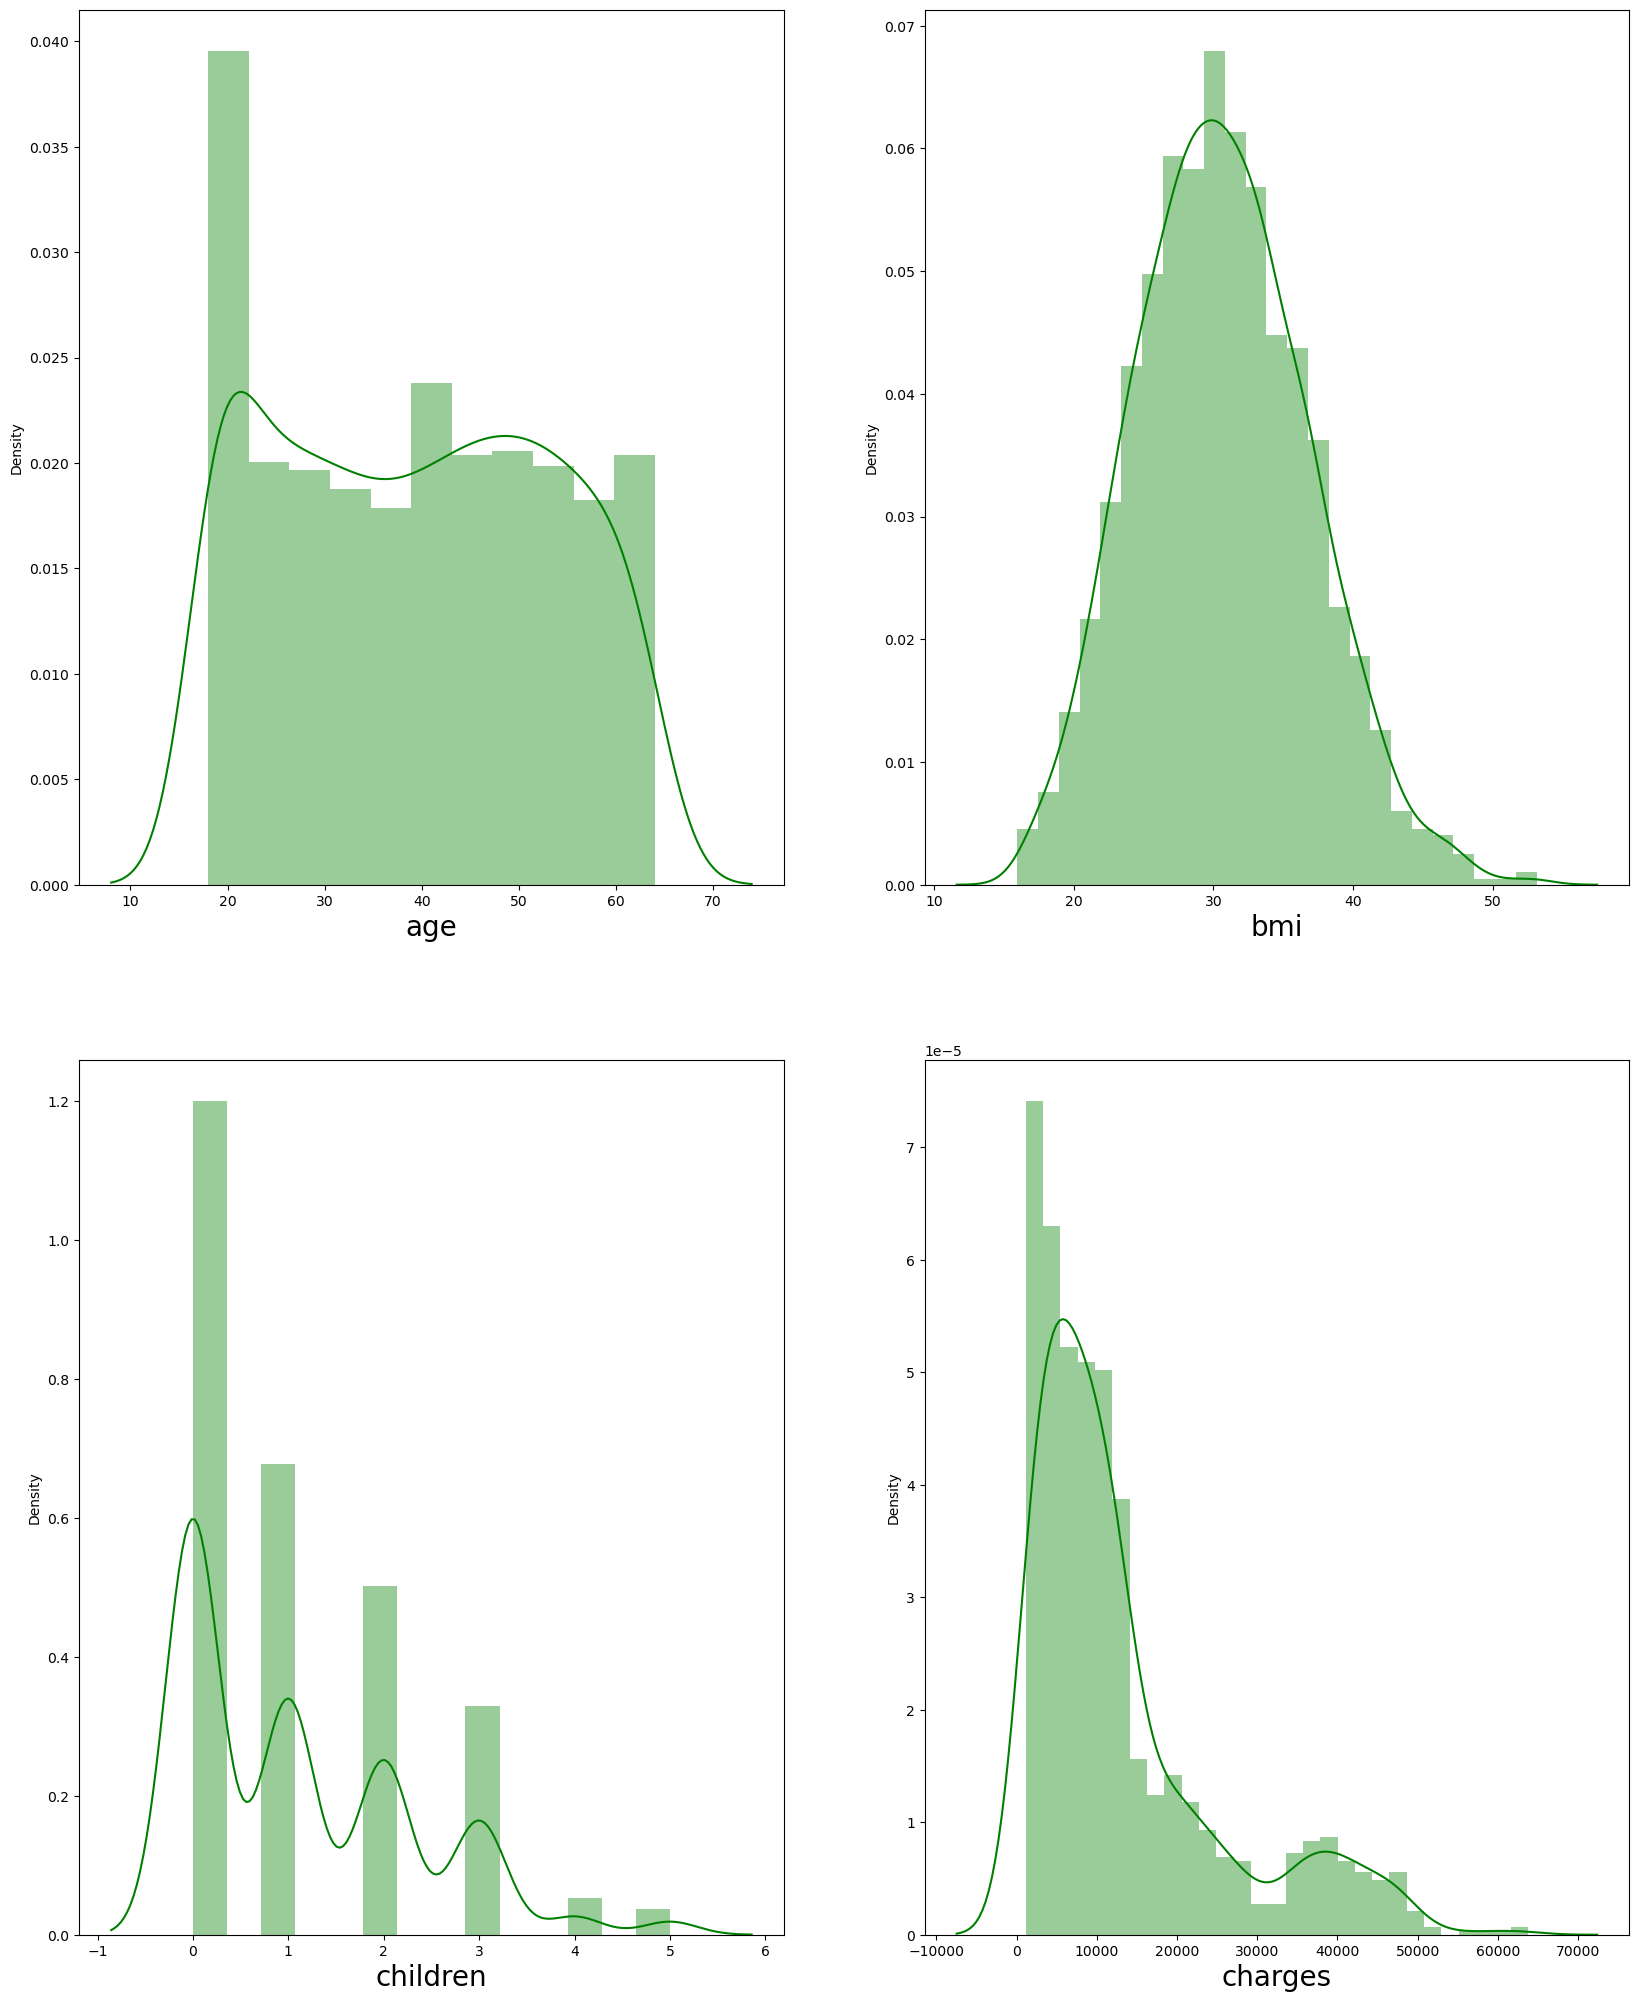

In [18]:
# Let's visualize the numerical columns
plt.figure(figsize =(20,25))
plotnumber =1

for i in num_col:
    if plotnumber<= 8:
        ax =plt.subplot(2,2, plotnumber)
        sns.distplot(df[i], color ='g')
        plt.xlabel(i, fontsize =20)
    plotnumber+=1
plt.show()

### Checking for Outliers

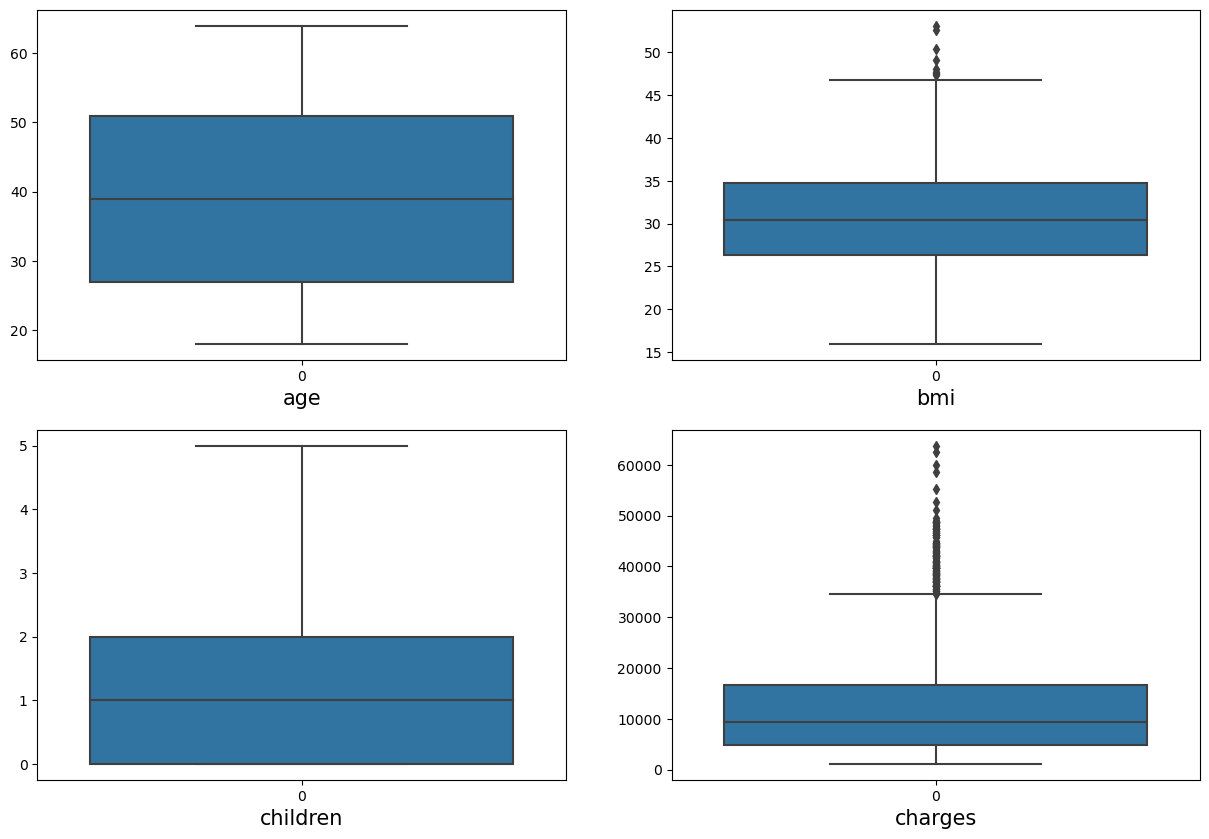

In [19]:
# Checking outlier by plotting box plot
plt.figure(figsize =(15,10))
plotnumber =1

for i in num_col:
    if plotnumber <=5:
        ax =plt.subplot(2,2, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.show()

In [20]:
# Outliers are present in bmi.
# Let's remove outlier using zscore
outlier_features =df['bmi']
z =np.abs(zscore(outlier_features))
z

0       0.453160
1       0.509422
2       0.383155
3       1.305052
4       0.292456
          ...   
1333    0.050269
1334    0.206053
1335    1.014490
1336    0.797524
1337    0.261299
Name: bmi, Length: 1337, dtype: float64

In [21]:
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),)

In [22]:
# Removing outliers and creating new dataset
df1 =df[(z<3)]
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
# Checking data loss
print("Shape of old dataset", df.shape[0])
print("Shape of New dataset", df1.shape[0])
print("Data loss: ", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Shape of old dataset 1337
Shape of New dataset 1333
Data loss:  0.2991772625280479


In [24]:
# Checking skewness in dataset
df2 =df[num_col]
df2.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

In [25]:
# Encoding categorical columns using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
OE =OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i] =OE.fit_transform(df1[i].values.reshape(-1, 1))
        
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   int64  
 1   sex       1333 non-null   float64
 2   bmi       1333 non-null   float64
 3   children  1333 non-null   int64  
 4   smoker    1333 non-null   float64
 5   region    1333 non-null   float64
 6   charges   1333 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 83.3 KB


### Checking correlation between features and label

In [27]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017987,0.118978,0.041406,-0.024390,0.002473,0.300658
sex,-0.017987,1.000000,0.037046,0.019357,0.076510,0.003641,0.057923
bmi,0.118978,0.037046,1.000000,0.018058,0.002264,0.155889,0.200868
children,0.041406,0.019357,0.018058,1.000000,0.006744,0.016924,0.066957
smoker,-0.024390,0.076510,0.002264,0.006744,1.000000,-0.002510,0.786519
region,0.002473,0.003641,0.155889,0.016924,-0.002510,1.000000,-0.006743
charges,0.300658,0.057923,0.200868,0.066957,0.786519,-0.006743,1.000000


<Axes: >

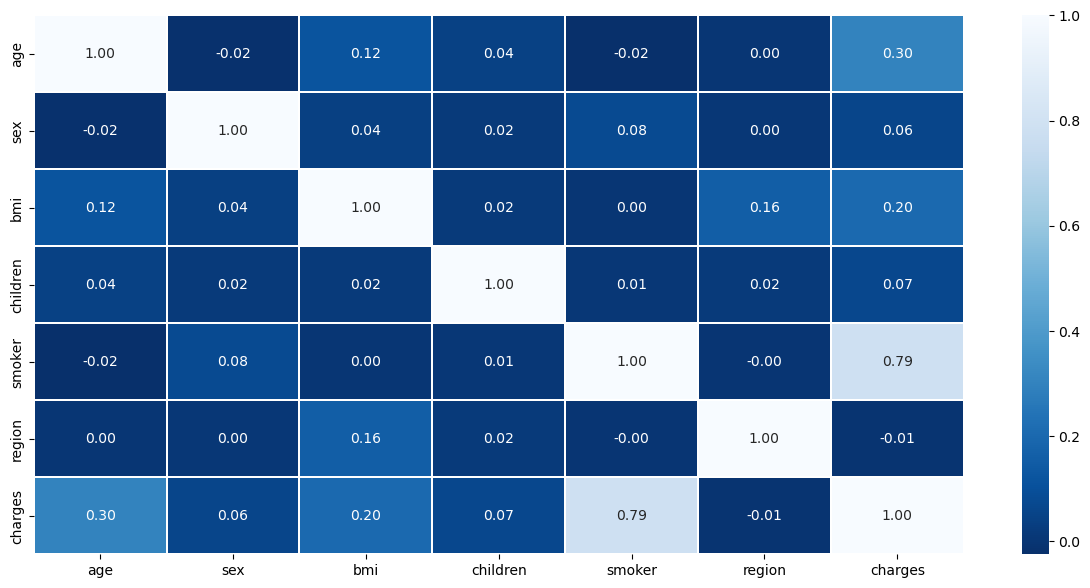

In [28]:
# Creating heatmap
plt.figure(figsize =(15,7))
sns.heatmap(df1.corr(), annot =True, fmt ='-.2f', linewidths =0.1, cmap ='Blues_r')

There is no multicollinearilty issue

In [29]:
# Seperating Features and labels
x =df1.drop('charges',axis =1)
y =df1['charges']

In [30]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


### Feature scaling using standard scalarization

In [31]:
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.443917,-1.006775,-0.450191,-0.909922,1.970478,1.342851
1,-1.515225,0.993271,0.527991,-0.080854,-0.507491,0.438800
2,-0.802147,0.993271,0.399678,1.577282,-0.507491,0.438800
3,-0.445607,0.993271,-1.315891,-0.909922,-0.507491,-0.465250
4,-0.516915,0.993271,-0.286883,-0.909922,-0.507491,-0.465250
...,...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.577282,-0.507491,-0.465250
1329,-1.515225,-1.006775,0.219705,-0.909922,-0.507491,-1.369301
1330,-1.515225,-1.006775,1.041245,-0.909922,-0.507491,0.438800
1331,-1.301302,-1.006775,-0.800137,-0.909922,-0.507491,1.342851


### Checking variance inflation factor

In [32]:
# Finding variance inflation factor in each scaled features
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

,VIF Values,Features
0,1.017356,age
1,1.008073,sex
2,1.041622,bmi
3,1.002544,children
4,1.006479,smoker
5,1.025430,region


## We have completed data pre-processing. Now we can build model

In [33]:
# Finding best random state
maxacc =0
maxrs =0

for i in range(1,200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    lr =LinearRegression()
    lr.fit(x_train, y_train)
    pred =lr.predict(x_test)
    acc =r2_score(y_test, pred)
    
    if maxacc > acc:
        maxacc =acc
        maxrs =i
        
print("Maximum Score is :", acc, "at random state ", i)

Maximum Score is : 0.7289276283817556 at random state  199


In [34]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [35]:
# Initializing models
lr =LinearRegression()
knn =KNeighborsRegressor()
RFR =RandomForestRegressor()
GBR =GradientBoostingRegressor()
lasso =Lasso()
ridge =Ridge()
DTR =DecisionTreeRegressor()
ETR =ExtraTreesRegressor()

In [38]:
models ={'LinearRegression': lr,
        'KNeighborsRegressor': knn,
        'RandomForestRegressor': RFR,
        'GradientBoostingRegressor': GBR,
        'Lasso': lasso,
        'Ridge': ridge,
        'DecisionTreeRegressor': DTR,
        'ExtraTreesRegressor': ETR,
        }

for name, model in models.items():
    model.fit(x_train, y_train)
    test_pred =model.predict(x_test)
    train_pred =model.predict(x_train)
    
    print(name)
    print("x"*20)
    print("R2 score on Training Data: ", r2_score(y_train, train_pred)*100)
    print("R2 score on Test Data: ", r2_score(y_test, test_pred)*100)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, test_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_absolute_error(y_test, test_pred)))
    print('\n')
    
    #Cross Validation
    score =cross_val_score(model, x, y, cv =5)
    print("Cross Validation")
    print("x"*20)
    print(score)
    print(score.mean())
    print("Difference between R2 Score and Cross Val Score is : ", (r2_score(y_test, test_pred) - score.mean())*100)
    print("="*80)
    print('\n')
    

LinearRegression
xxxxxxxxxxxxxxxxxxxx
R2 score on Training Data:  75.60985820739084
R2 score on Test Data:  73.5525126152956
Mean Absolute Error:  4411.6881713251805
Mean Squared Error:  41376947.06705608
Root Mean Squared Error:  66.4205402817922


Cross Validation
xxxxxxxxxxxxxxxxxxxx
[0.76244183 0.70819898 0.775179   0.73289379 0.75587313]
0.7469173454313716
Difference between R2 Score and Cross Val Score is :  -1.1392219278415605


KNeighborsRegressor
xxxxxxxxxxxxxxxxxxxx
R2 score on Training Data:  86.66057621219524
R2 score on Test Data:  80.95340511010363
Mean Absolute Error:  3412.2884165375003
Mean Squared Error:  29798291.879427657
Root Mean Squared Error:  58.41479621241095


Cross Validation
xxxxxxxxxxxxxxxxxxxx
[0.82380042 0.75518371 0.83689594 0.80187345 0.80757419]
0.8050655418851447
Difference between R2 Score and Cross Val Score is :  0.4468509215891703


RandomForestRegressor
xxxxxxxxxxxxxxxxxxxx
R2 score on Training Data:  97.5001933480799
R2 score on Test Data:  85.

GradientBoostingRegressor has the highest r2 score and minimum cross validation difference.

In [42]:
parameters ={'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
            'learning_rate': [0.1, .01, 0.3, 0.04],
            'n_estimators': [50, 100, 150, 200, 250],
            'criterion': ['friedman_mse', 'squared_error'],
            }

In [43]:
GCV =GridSearchCV(GradientBoostingRegressor(), parameters, cv =5)

In [44]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.01, 0.3, 0.04],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [45]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'huber',
 'n_estimators': 50}

In [47]:
Final_model =GradientBoostingRegressor(criterion ='friedman_mse',
                                      learning_rate =0.1,
                                      loss ='huber',
                                      n_estimators =50)

Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is: ", acc*100)

Accuracy is:  86.11597158976024


#### Accuracy of model is increased from 85.59 to 86.11 after hyperparameter tunning.

In [49]:
### Saving Model
pickle.dump(Final_model, open('Medical Cost Prediction.pkl', 'wb'))

In [55]:
# Loading Model
loaded_model =pickle.load(open('Medical Cost Prediction.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

86.11597158976024


In [62]:
compare =pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:],(loaded_model.predict(x_test)[:]-y_test[:])],
                      index =["Predicted", "Original", 'Difference'])

In [59]:
compare

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Predicted,6223.278758,12975.378802,7754.461366,44436.940208,11502.23576,22077.205576,3483.487485,10930.111671,11338.181109,10820.547629,...,39941.040048,10820.547629,3374.504913,22741.442064,2531.58139,8627.585698,43747.265796,8311.138198,4943.809517,12672.037221
Original,5124.188700,12730.999600,7682.670000,44260.749900,11305.93455,19964.746300,3761.292000,10560.491700,35160.134570,20781.488920,...,39983.425950,10226.284200,2416.955000,21774.322150,2200.83085,8516.829000,43254.417950,7731.427100,4340.440900,12146.971000
Difference,1099.090058,244.379202,71.791366,176.190308,196.30121,2112.459276,-277.804515,369.619971,-23821.953461,-9960.941291,...,-42.385902,594.263429,957.549913,967.119914,330.75054,110.756698,492.847846,579.711098,603.368617,525.066221
